### Beispiel Perzeptron
Für ein linear trennbares Zweiklassenproblem sollen die Parameter des Perzeptronklassifikators gelernt werden. Dabei soll folgendes untersucht werden:
- Einfluss der Lernkonstanten $\alpha$
- Einfluss der Reihenfolge der Daten

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


### Dateneingabe 1
Daten, Klassenbezeichnungen und Trennflächenparameter eingeben

In [2]:
k = np.array([[2.0, 1.0, 0.5, 0.0] , [4.0, 0.5, 1.5, 0.5]])
kn = [1, 1, -1, -1]
w = np.array([0.0, 1.0, -1.0])

Dataframe erzeugen

In [3]:
df = pd.DataFrame(np.transpose(k), columns=['x1', 'x2'])
dfk = pd.DataFrame(np.transpose(kn), columns=['Klasse'])
df_ges = pd.concat([df, dfk], axis = 1)

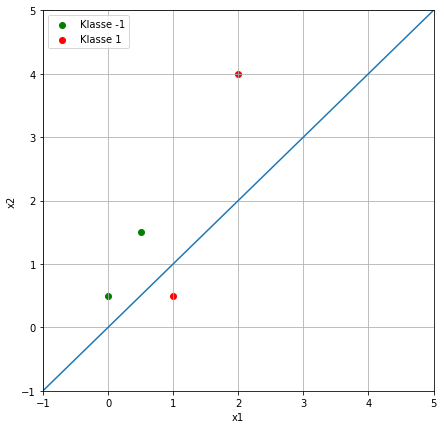

In [4]:
sh.show_res(df_ges, w)

### schrittweise Änderung
Datenpunkt, Klasse und Lernkonstante für Berechnung der neuen Trennfläche eingeben

In [5]:
d_korr = [2, 4]
cl = 1
alpha = 0.1

In [6]:
d_korr = np.append(1, d_korr)
w = w + 2 * alpha * d_korr * cl
print(w)

[ 0.2  1.4 -0.2]


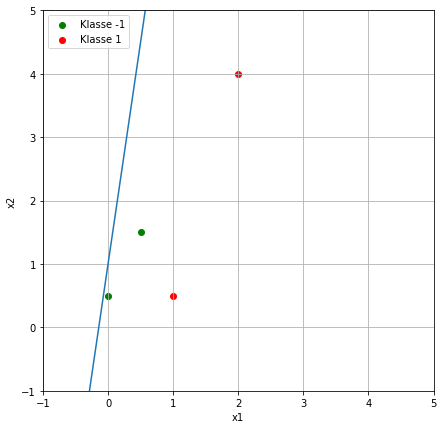

In [7]:
sh.show_res(df_ges, w)

### Iterative Berechnung:

Lernkonstante und Anzahl der Iterationen eingeben

In [8]:
alpha = 0.1
n_iter = 20
w = np.array([0.0, 1.0, -1.0])

In [9]:
for i in range(0, n_iter):
    err = 0
    for d in range(0, len(df_ges)):
        df_h = df_ges.values[d,0:2]
        df_h = np.append(1, df_h)
        #print('Datenpunkt: ', df_h)
        e = np.sign(np.dot(df_h, w)) - df_ges.values[d,2]
        if e != 0:
            err = err + 1
            w = w + 2 * alpha * df_h * df_ges.values[d,2]
            #print('Parametervektor: ', w)
    if err == 0:
        print('Iterationen bis Konvergenz: ', i)
        break

Iterationen bis Konvergenz:  1


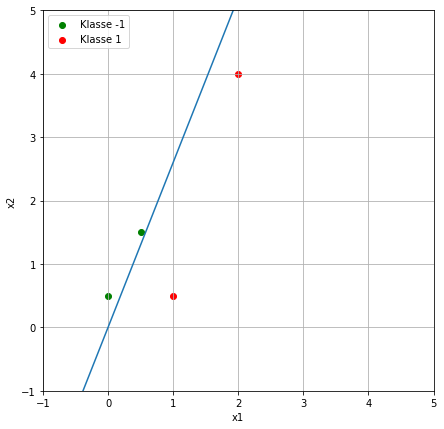

In [10]:
sh.show_res(df_ges, w)

### Dateneingabe 2

In [ ]:
df_name = 'df_perz.txt'
df = pd.read_pickle('data/' + df_name)

In [ ]:
w = [0.0, 1.0, -1.0]
sh.show_res1(df, w)

In [ ]:
alpha = 0.1
n_iter = 2000

In [ ]:
for i in range(0, n_iter):
    err = 0
    for d in range(0, len(df)):
        df_h = df.values[d,0:2]
        df_h = np.append(1, df_h)
        #print('Datenpunkt: ', df_h)
        e = np.sign(np.dot(df_h, w)) - df.values[d,2]
        if e != 0:
            err = err + 1
            w = w + 2 * alpha * df_h * df.values[d,2]
            #print('Parametervektor: ', w)
    if err == 0:
        print('Iterationen bis Konvergenz: ', i)
        break

In [ ]:
sh.show_res1(df, w)